In [ ]:
!pip install split-folders

In [ ]:
path='/content/drive/My Drive/btech project/voice-classification-master'

In [ ]:
import splitfolders
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(path+'/speaker_final/', output=path+"/data", seed=1337, ratio=(.7, .3)) # default values

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [ ]:
import keras
import tensorflow as tf


In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras import optimizers
from keras.layers.advanced_activations import ELU, PReLU, LeakyReLU
from keras.layers import Dense, Dropout, Activation, Flatten
!pip install keras_metrics
import keras_metrics
from keras import layers
from keras import callbacks
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3),  padding='same',
                 input_shape=(64, 64, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''
model.add(Flatten())
#model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(80))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6,)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy','mse',keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        4

In [ ]:

model.load_weights(path+"/weights/tempmodel2.h5")

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1), #to apply some random tranfromations
 #to apply zoom
        ) # im


In [ ]:
 training_set = train_datagen.flow_from_directory(path+
        '/data/train', 
        target_size=(64, 64),
        batch_size=1024,
        class_mode='categorical',
        shuffle = True)
test_set = test_datagen.flow_from_directory(path+
        '/data/val',
        target_size=(64, 64),
        batch_size=1024,
        class_mode='categorical',
        shuffle = True )

Found 18829 images belonging to 80 classes.
Found 8118 images belonging to 80 classes.


In [ ]:
!pip install -q pyyaml h5py

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
mc = ModelCheckpoint(path+'/weights/tempmodel2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history=model.fit(
        training_set,
        #steps_per_epoch=589,
        epochs=10,
        validation_data=test_set,
        #validation_steps=254,
        use_multiprocessing=True,
        workers=16,
        callbacks=[es,mc])
         
                    
                   
#validation_steps=7


In [ ]:
!nvidia-smi


Mon Nov  9 18:17:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model.save_weights(path+"/model.h5")

In [ ]:
model.save(path+'/my_model.h5') 

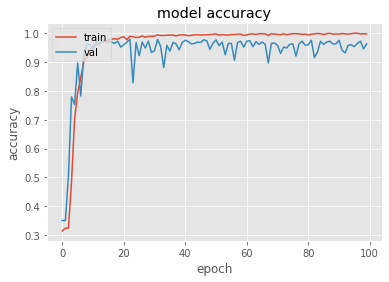

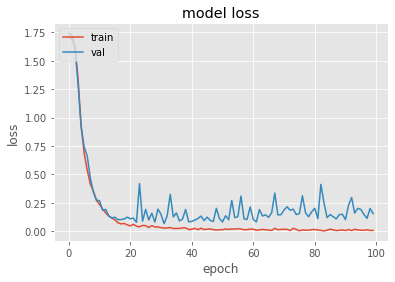

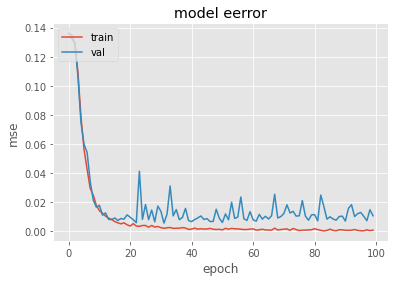

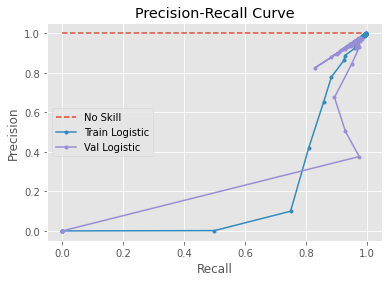

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model eerror')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(history.history['precision_2'], history.history['recall_2'], marker='.', label='Train Logistic')
plt.plot(history.history['val_precision_2'],history.history['val_recall_2'], marker='.', label='Val Logistic')
plt.title('Precision-Recall Curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
